Password

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

tr = int(await input())
im = cv2.imread('images/in.png', 0)
im[im < tr] = 0
im[im >= tr] = 255
plt.imshow(im, cmap='gray')
plt.show

Filtering

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img1 = cv2.imread('images/number_8_v2.jpg')

In [ ]:
plt.figure(figsize=(10,8))
imgplot = plt.imshow(img1)

In [ ]:
img_butterfly_noisy = cv2.imread('images/s_p_noise_img_1.jpg')
plt.figure(figsize=(10,8))
imgplot = plt.imshow(img_butterfly_noisy)

In [ ]:
print('Enter the kernel size, this should be an odd number')
n = int(await input('number of rows ='))
m = int(await input('number of columns ='))
kernel = np.zeros([n,m])
print('Enter kernels index, We will normalize it:')
for i in range(n):
  for j in range(m):
    kernel[i,j] = float(await input(f'row {i} and col {j} = '))
kernel = kernel/np.sum(kernel)

In [ ]:
filter_im = cv2.filter2D(img_butterfly_noisy,-1,kernel)
plt.figure(figsize=(10,8))
imgplot = plt.imshow(filter_im)

some filter examples

In [ ]:
# box filter 3*3
box_3 = cv2.imread('images/box_filter_img1_3.jpg')
plt.figure(figsize=(10,8))
imgplot = plt.imshow(box_3)

In [ ]:
# box filter 5*5
box_5 = cv2.imread('images/box_filter_img1_5.jpg')
plt.figure(figsize=(10,8))
imgplot = plt.imshow(box_5)

In [ ]:
# box filter 7*7
box_7 = cv2.imread('images/box_filter_img1_7.jpg')
plt.figure(figsize=(10,8))
imgplot = plt.imshow(box_7)

In [ ]:
# gaussian filter 3*3
gaussian_3 = cv2.imread('images/gaussian_img1_3.jpg')
plt.figure(figsize=(10,8))
imgplot = plt.imshow(gaussian_3)

In [ ]:
# gaussian filter 5*5
gaussian_5 = cv2.imread('images/gaussian_img1_5.jpg')
plt.figure(figsize=(10,8))
imgplot = plt.imshow(gaussian_5)

In [ ]:
# gaussian filter 7*7
gaussian_7 = cv2.imread('images/gaussian_img1_7.jpg')
plt.figure(figsize=(10,8))
imgplot = plt.imshow(gaussian_7)

In [ ]:
rainbow = cv2.imread('images/rainbow.png')
plt.figure(figsize=(10,8))
imgplot = plt.imshow(rainbow)

In [ ]:
gray_rainbow = cv2.imread('images/rainbow2.png')
plt.figure(figsize=(10,8))
imgplot = plt.imshow(gray_rainbow)

In [ ]:
plot_rainbow = cv2.imread('images/plot.png')
plt.figure(figsize=(10,8))
imgplot = plt.imshow(plot_rainbow)

In [ ]:
chess = cv2.imread('images/chess.png').astype(np.float32)
plt.figure(figsize=(10,8))
imgplot = plt.imshow(chess)

In [ ]:
print('Enter the kernel size, this should be an odd number')
n = int(await input('number of rows = '))
m = int(await input('number of columns = '))
kernel = np.zeros([n,m])
for i in range(n):
  for j in range(m):
    kernel[i,j] = float(await input(f'row {i} and col {j} = '))
vertical_lines = cv2.filter2D(chess,-1,kernel)
vertical_lines = np.abs(vertical_lines)
plt.figure(figsize=(10,8))
imgplot = plt.imshow(vertical_lines)

In [ ]:
print('Design a kernel to find horizontal lines!')
n = int(await input('number of rows = '))
m = int(await input('number of columns = '))
kernel = np.zeros([n,m])
for i in range(n):
  for j in range(m):
    kernel[i,j] = float(await input(f'row {i} and col {j} = '))
horizontal_lines = cv2.filter2D(chess,-1,kernel)
horizontal_lines = np.abs(horizontal_lines)
plt.figure(figsize=(10,8))
imgplot = plt.imshow(horizontal_lines)

# Blending

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_sarabless = cv2.imread('images/sarabless.jpg')
img_sarabless = cv2.cvtColor(img_sarabless, cv2.COLOR_BGR2RGB)
img_doogh = cv2.imread('images/doogh.jpg')
img_doogh = cv2.cvtColor(img_doogh, cv2.COLOR_BGR2RGB)
img_main = cv2.imread('images/main_blend.png')
img_main = cv2.cvtColor(img_main, cv2.COLOR_BGR2RGB)
img_doogh_border = cv2.imread('images/doogh_br.jpg')
img_doogh_border = cv2.cvtColor(img_doogh_border, cv2.COLOR_BGR2RGB)
img_doogh_main = cv2.imread('images/doogh_org.jpg')
img_doogh_main = cv2.cvtColor(img_doogh_main, cv2.COLOR_BGR2RGB)

Blending 1

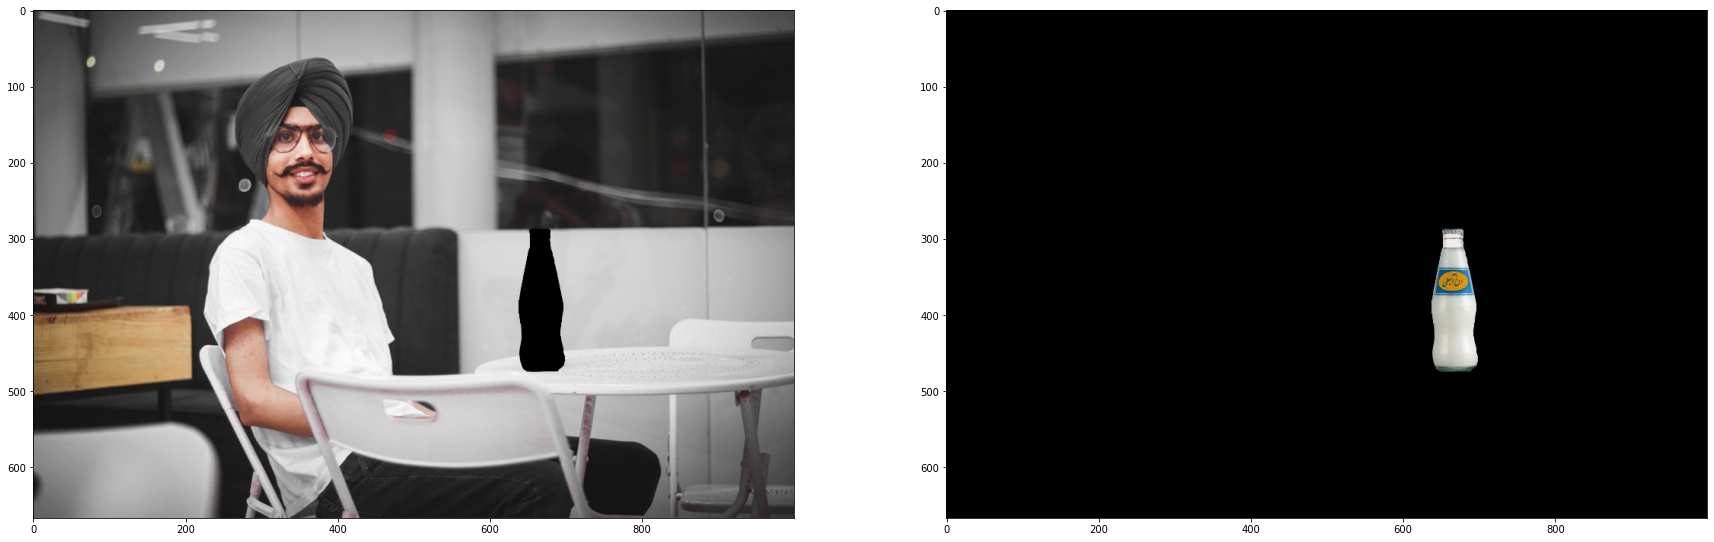

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(30, 40))
axs[0].imshow(img_sarabless)
axs[1].imshow(img_doogh)
plt.show()

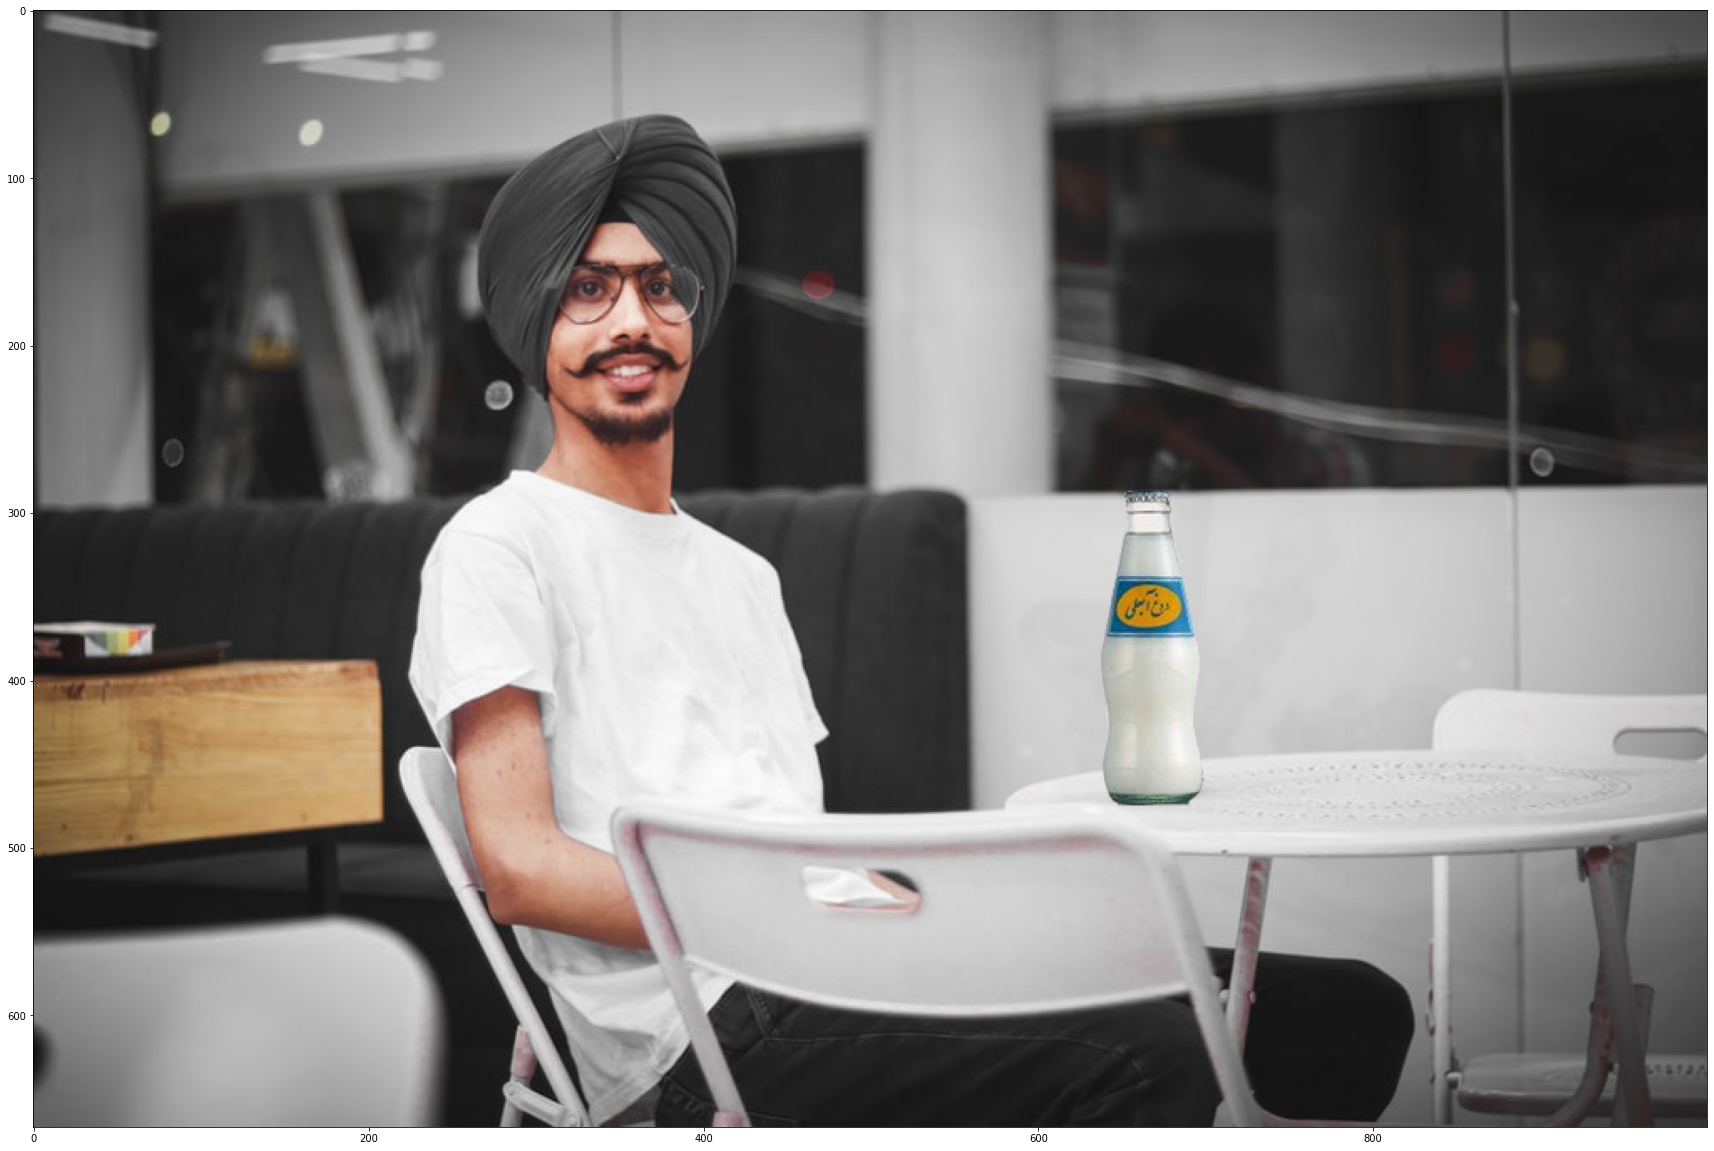

True

In [ ]:
add_okay = img_sarabless + img_doogh
plt.figure(figsize=(30, 40))
plt.imshow(add_okay)
plt.show()
cv2.imwrite('rr1.jpg', cv2.cvtColor(add_okay, cv2.COLOR_RGB2BGR))

Blending 2

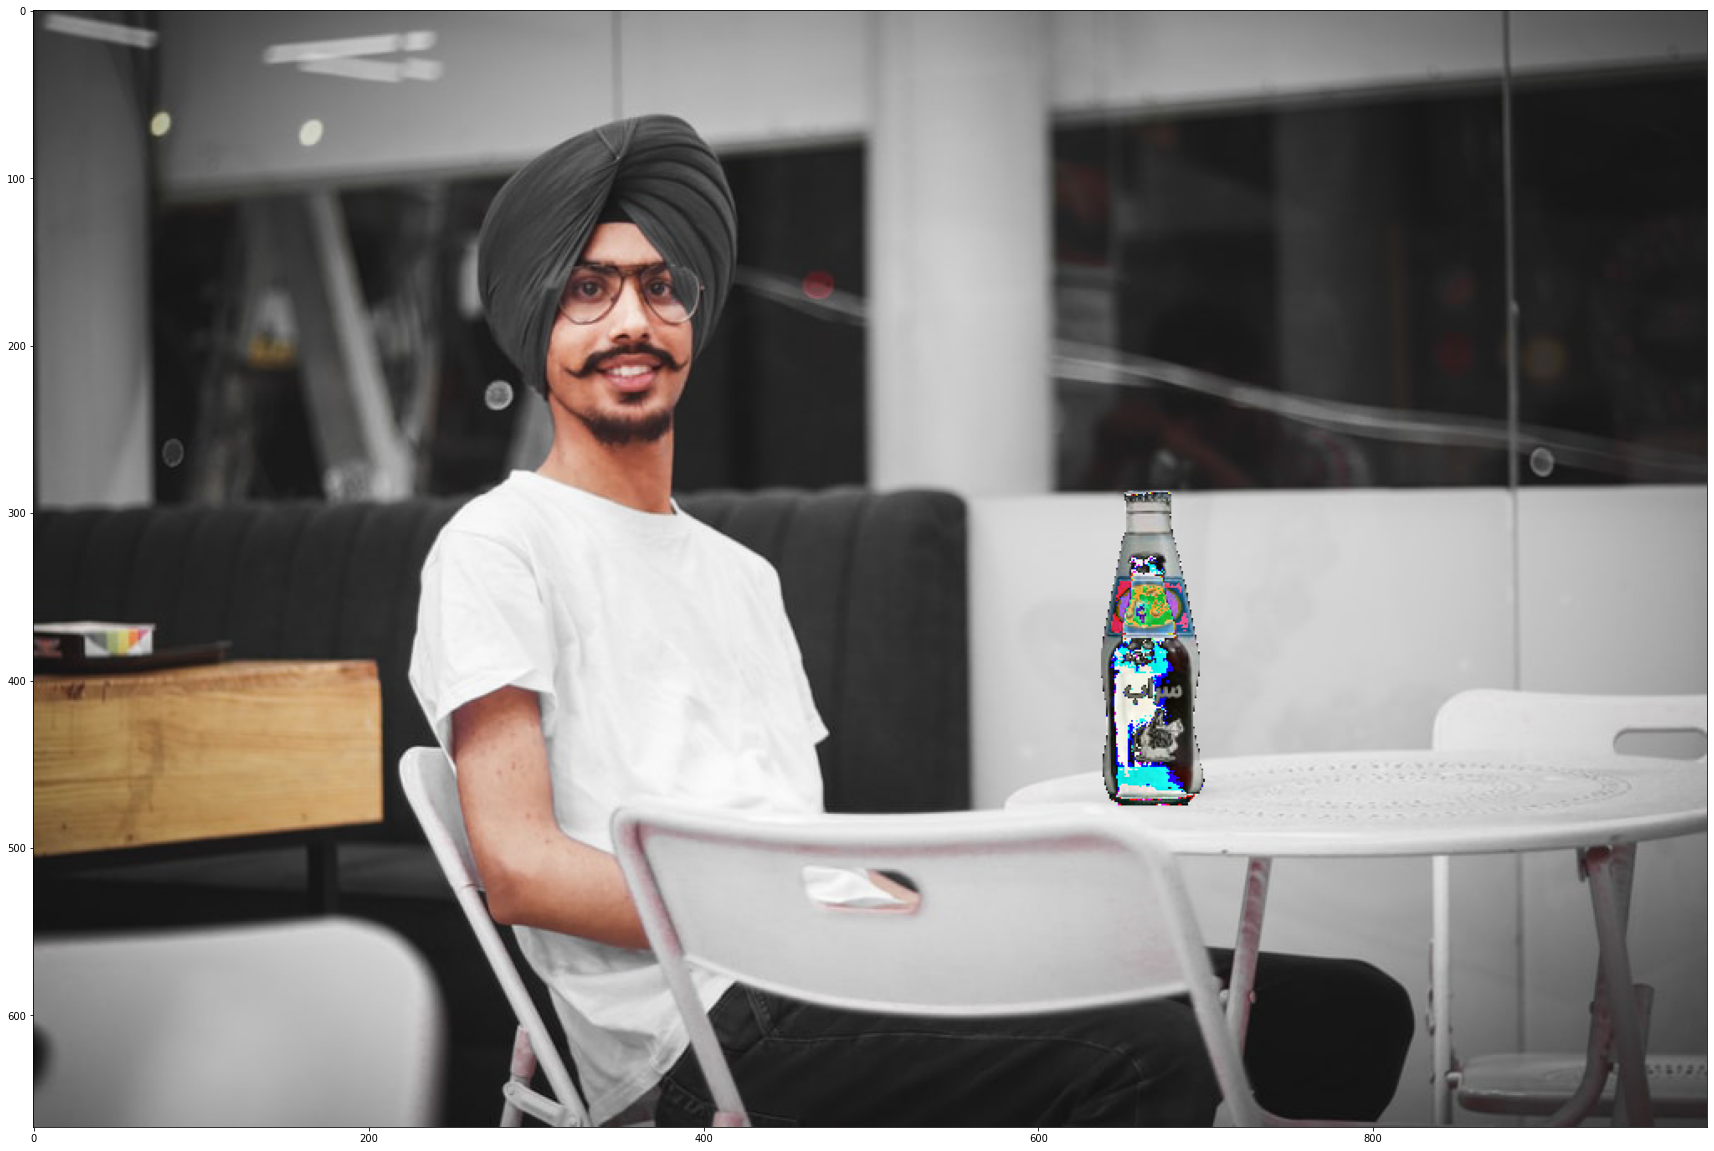

True

In [ ]:
add_corrupted = img_main + img_doogh
plt.figure(figsize=(30, 40))
plt.imshow(add_corrupted)
plt.show()
cv2.imwrite('rr2.jpg', cv2.cvtColor(add_corrupted, cv2.COLOR_RGB2BGR))

Blending 3

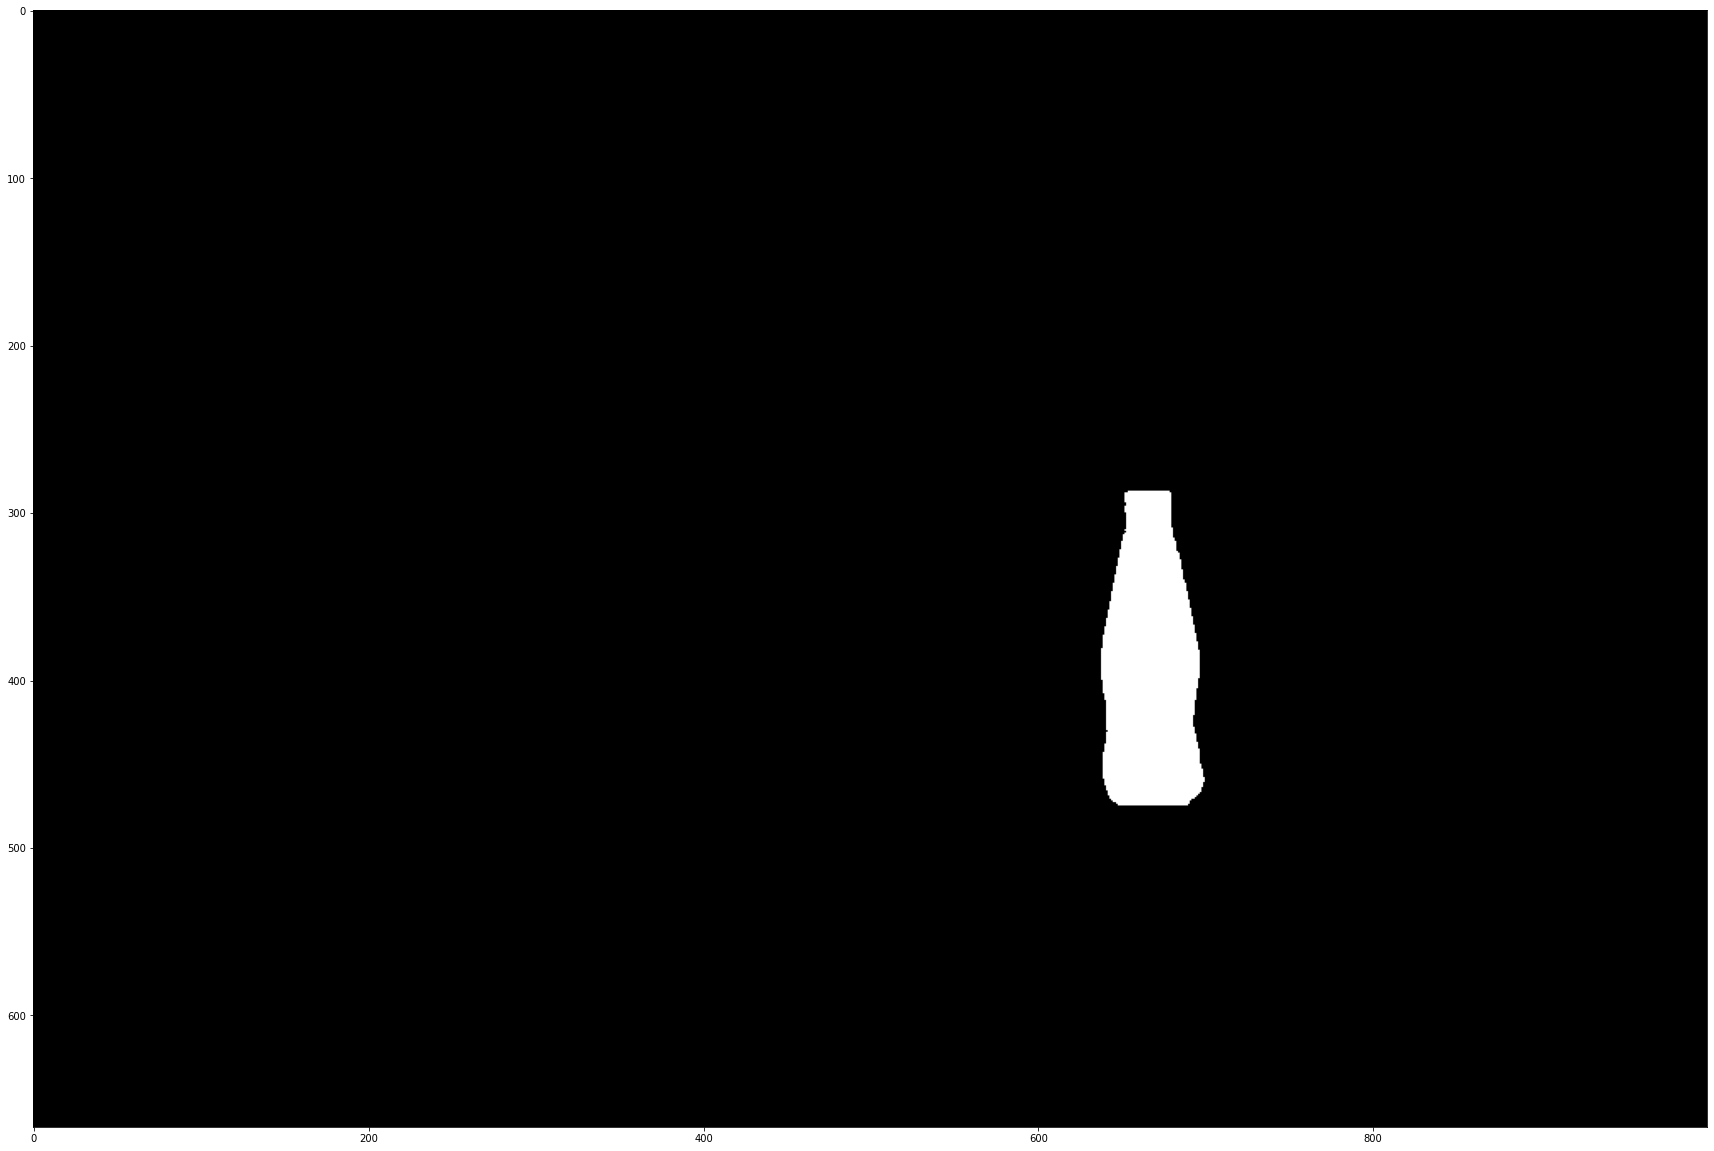

In [ ]:
doogh_mask = np.zeros(img_doogh.shape, dtype=type(img_doogh[0, 0 ,0]))
mk = np.bitwise_or(np.bitwise_or((img_doogh[:, :, 0] >= 10), (img_doogh[:, :, 1] >= 10)), (img_doogh[:, :, 2] >= 10))
doogh_mask[mk] = 255
plt.figure(figsize=(30, 40))
plt.imshow(doogh_mask, cmap='gray')
plt.show()

Blending 4

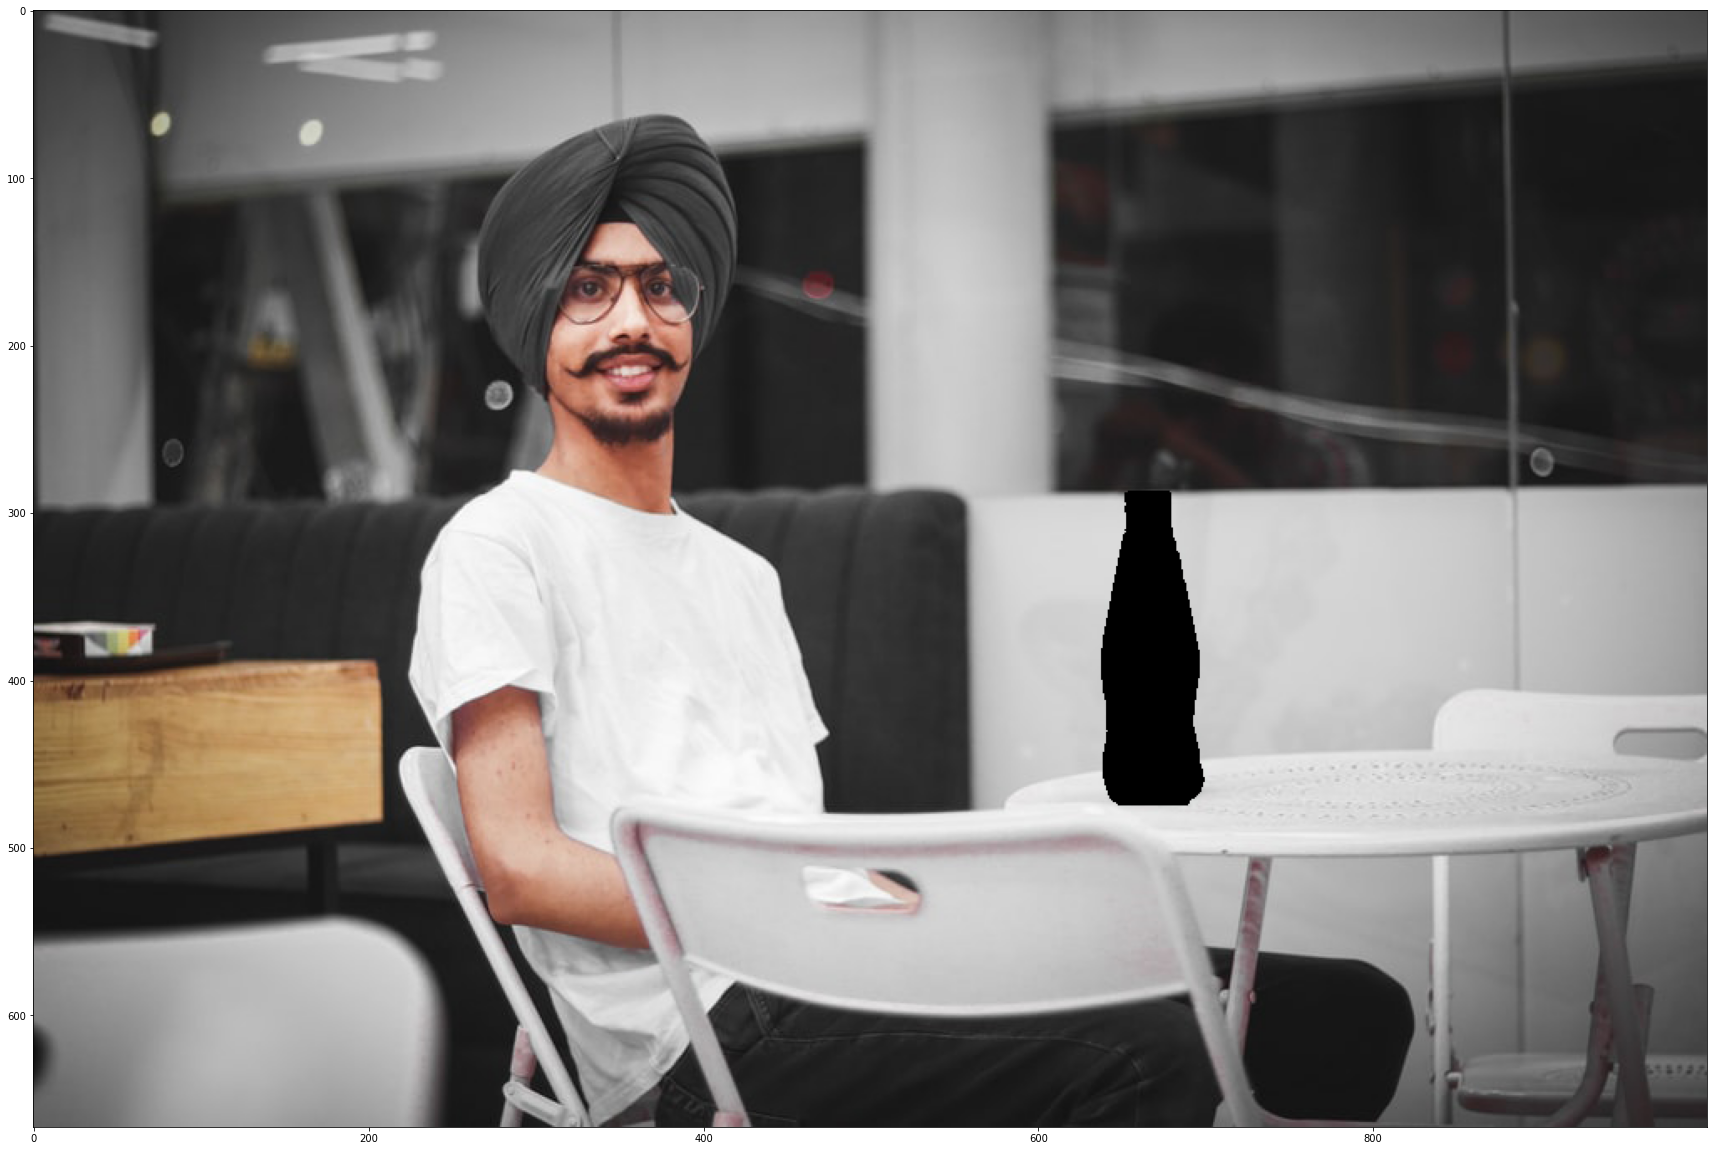

In [ ]:
masked_img = cv2.bitwise_and(img_main, 255-doogh_mask)
plt.figure(figsize=(30, 40))
plt.imshow(masked_img)
plt.show()

Blending 5

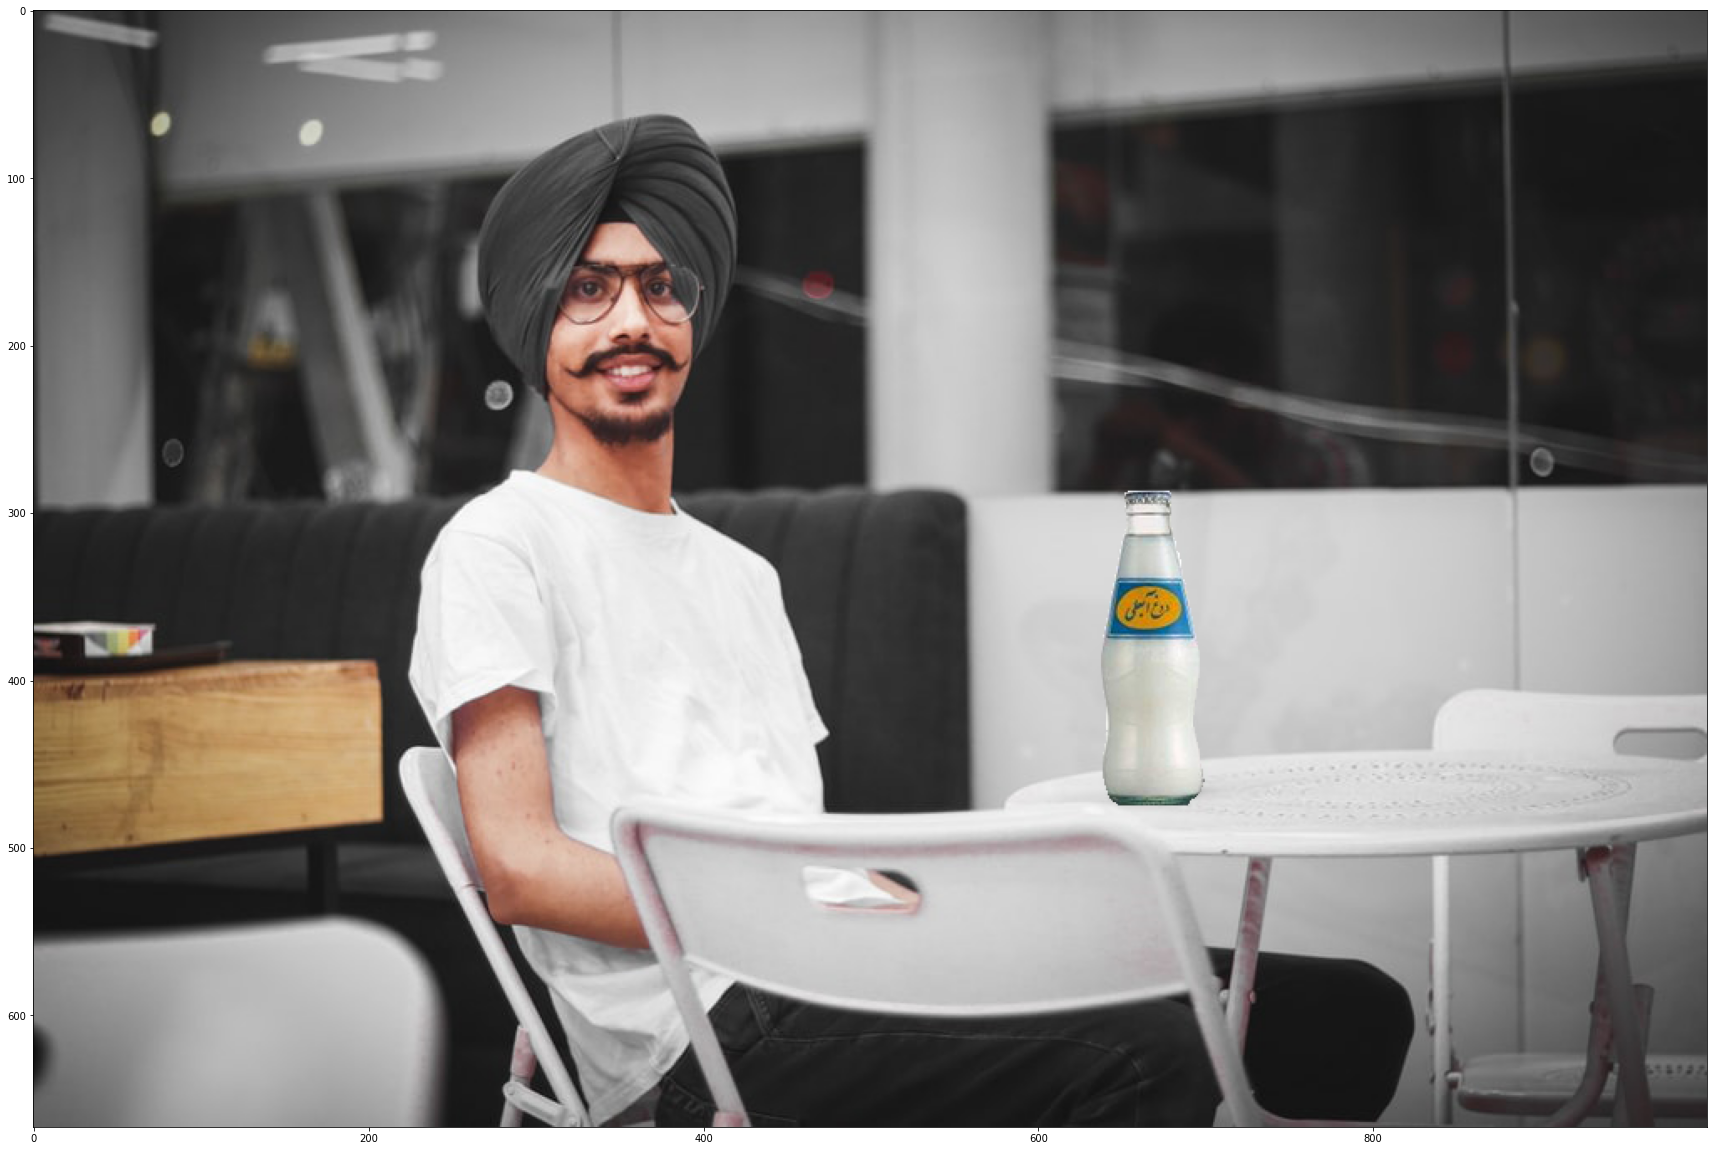

In [ ]:
mask = doogh_mask/np.amax(doogh_mask);
img1 = np.multiply(img_main.astype('double'), 1-mask)
img2 = np.multiply(img_doogh_main.astype('double'), mask)
blend = img1 + img2
blend = blend.astype('uint8')
plt.figure(figsize=(30, 40))
plt.imshow(blend)
plt.show()

Blending 6

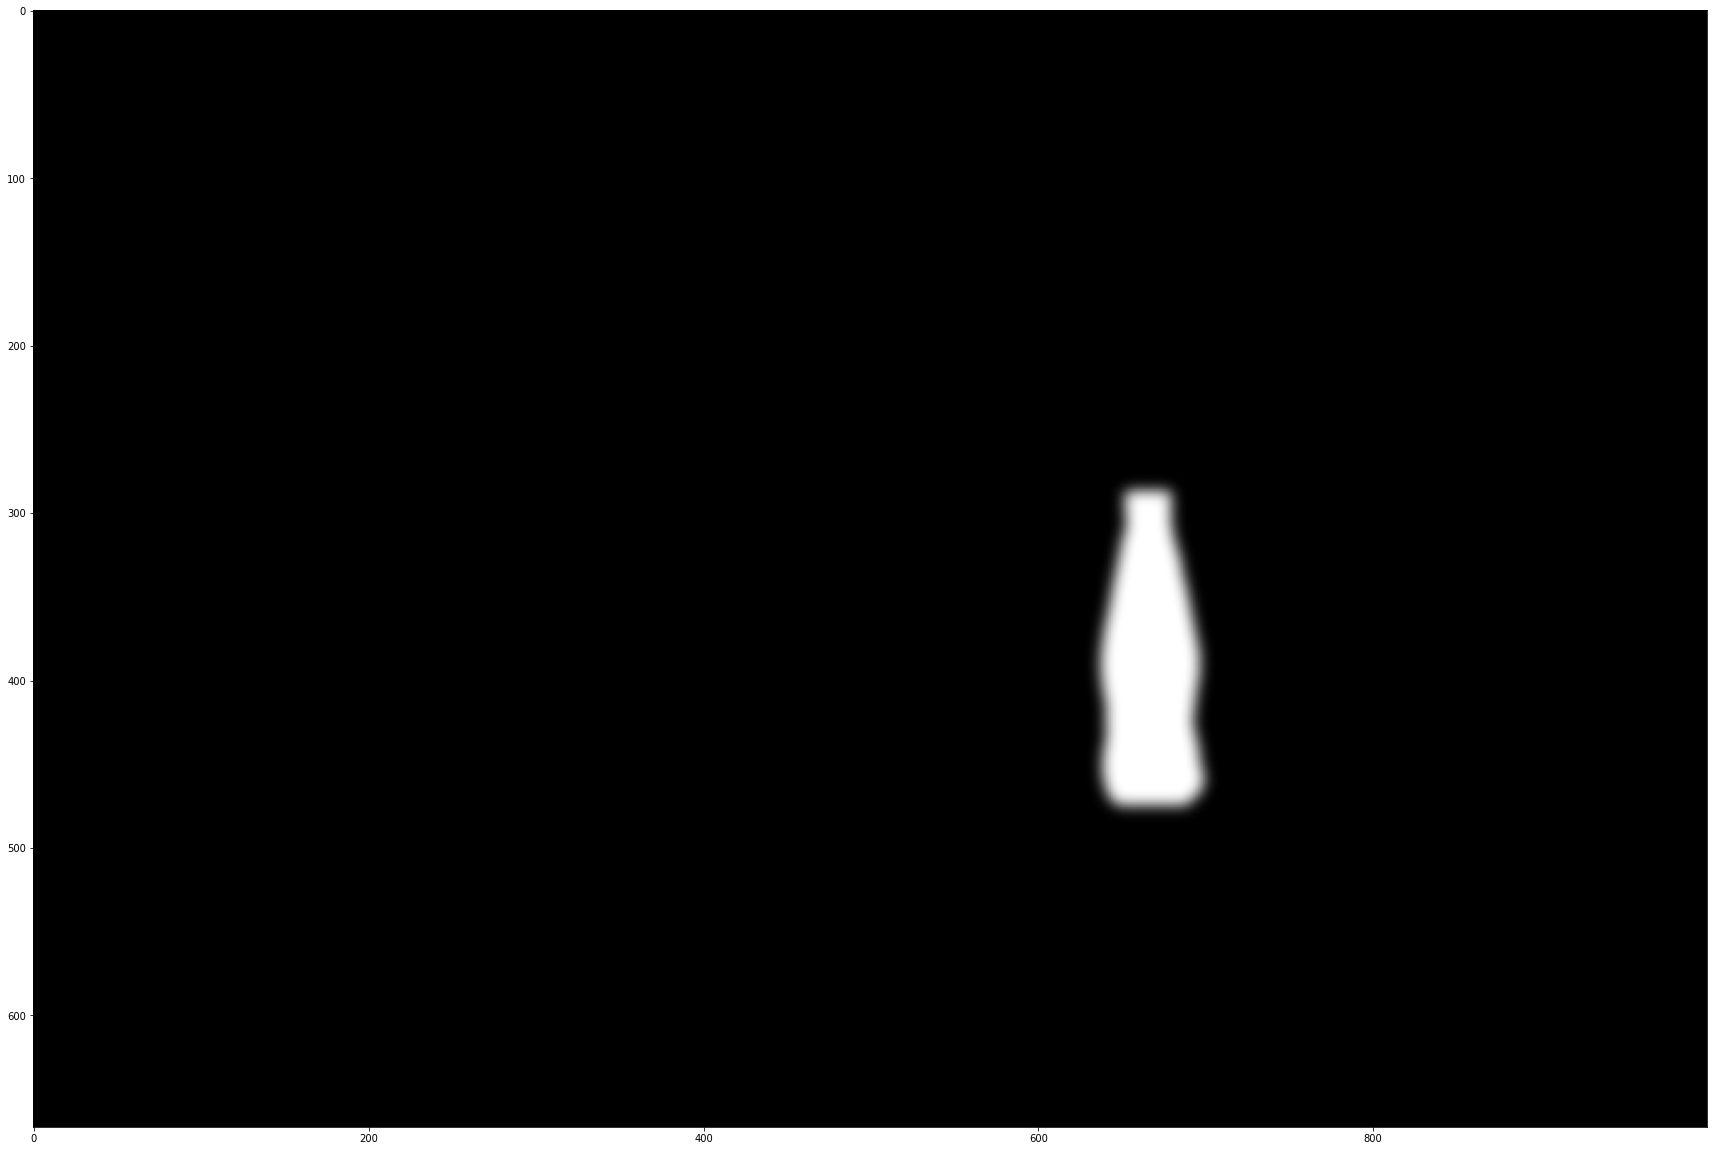

In [ ]:
doogh_mask = np.zeros(img_doogh.shape, dtype=type(img_doogh[0, 0 ,0]))
mk = np.bitwise_or(np.bitwise_or((img_doogh[:, :, 0] >= 10), (img_doogh[:, :, 1] >= 10)), (img_doogh[:, :, 2] >= 10))
doogh_mask[mk] = 255
gaussian_mask = cv2.GaussianBlur(doogh_mask, (25, 25), 0)
plt.figure(figsize=(30, 40))
plt.imshow(gaussian_mask)
plt.show()

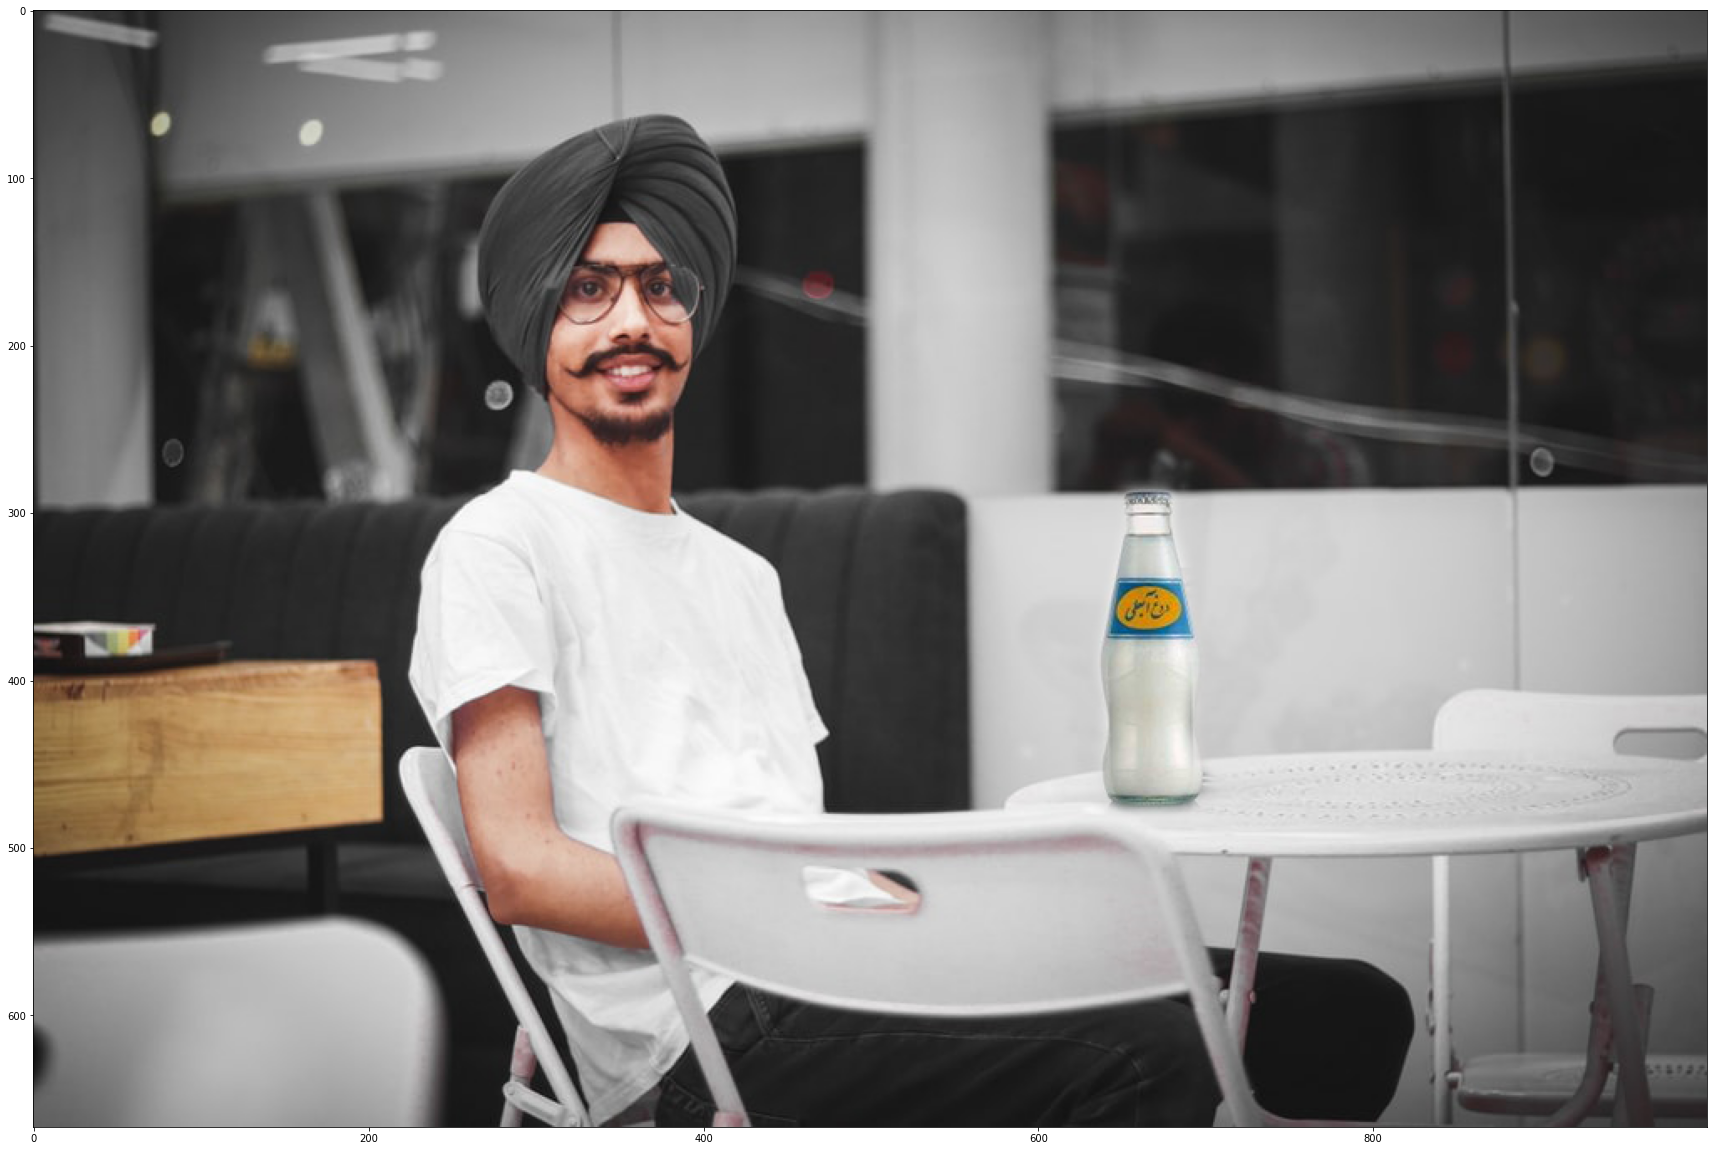

In [ ]:
mask = gaussian_mask/np.amax(gaussian_mask);
img1 = np.multiply(img_main.astype('double'), 1-mask)
img2 = np.multiply(img_doogh_main.astype('double'), mask)
blend = img1 + img2
blend = blend.astype('uint8')
plt.figure(figsize=(30, 40))
plt.imshow(blend)
plt.show()

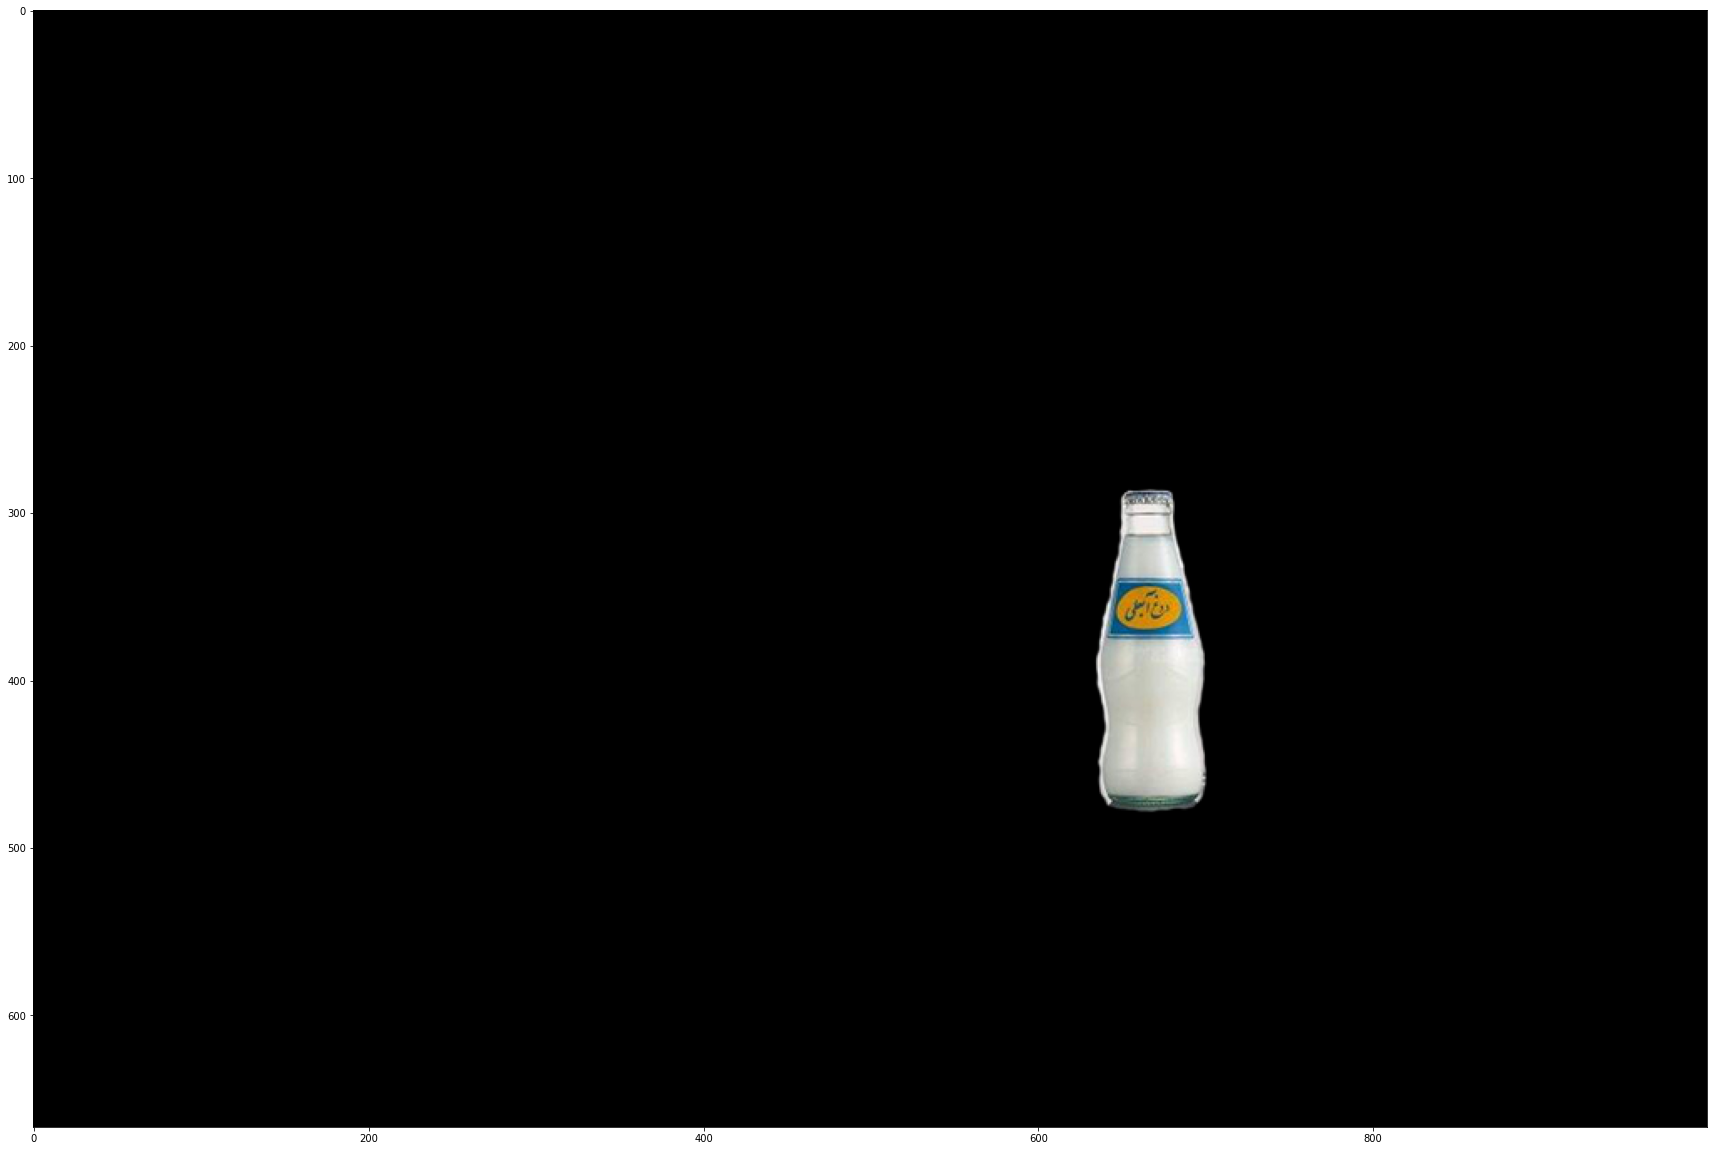

In [ ]:
plt.figure(figsize=(30, 40))
plt.imshow(img_doogh_border)
plt.show()

Blending 7

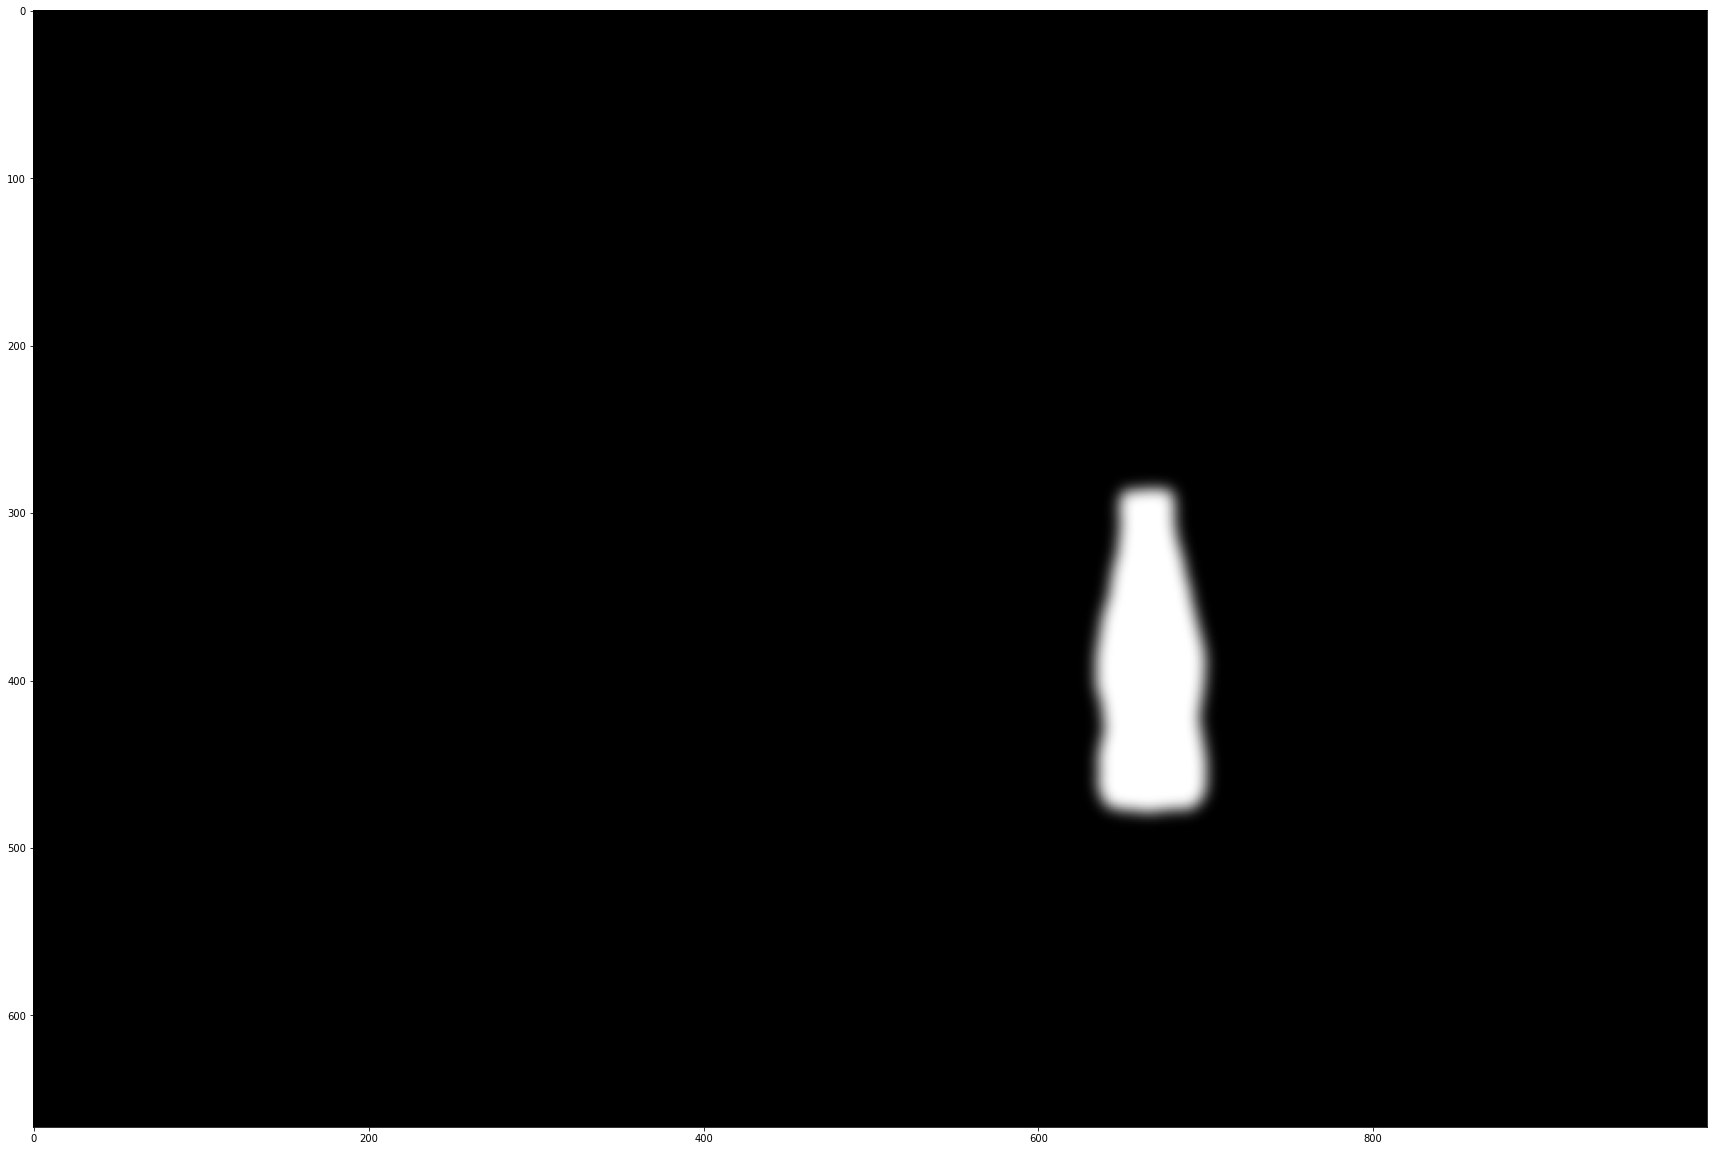

In [ ]:
doogh_mask = np.zeros(img_doogh_border.shape, dtype=type(img_doogh[0, 0 ,0]))
mk = np.bitwise_or(np.bitwise_or((img_doogh_border[:, :, 0] >= 10), (img_doogh_border[:, :, 1] >= 10)), (img_doogh_border[:, :, 2] >= 10))
doogh_mask[mk] = 255
gaussian_mask = cv2.GaussianBlur(doogh_mask, (25, 25), 0)
plt.figure(figsize=(30, 40))
plt.imshow(gaussian_mask)
plt.show()

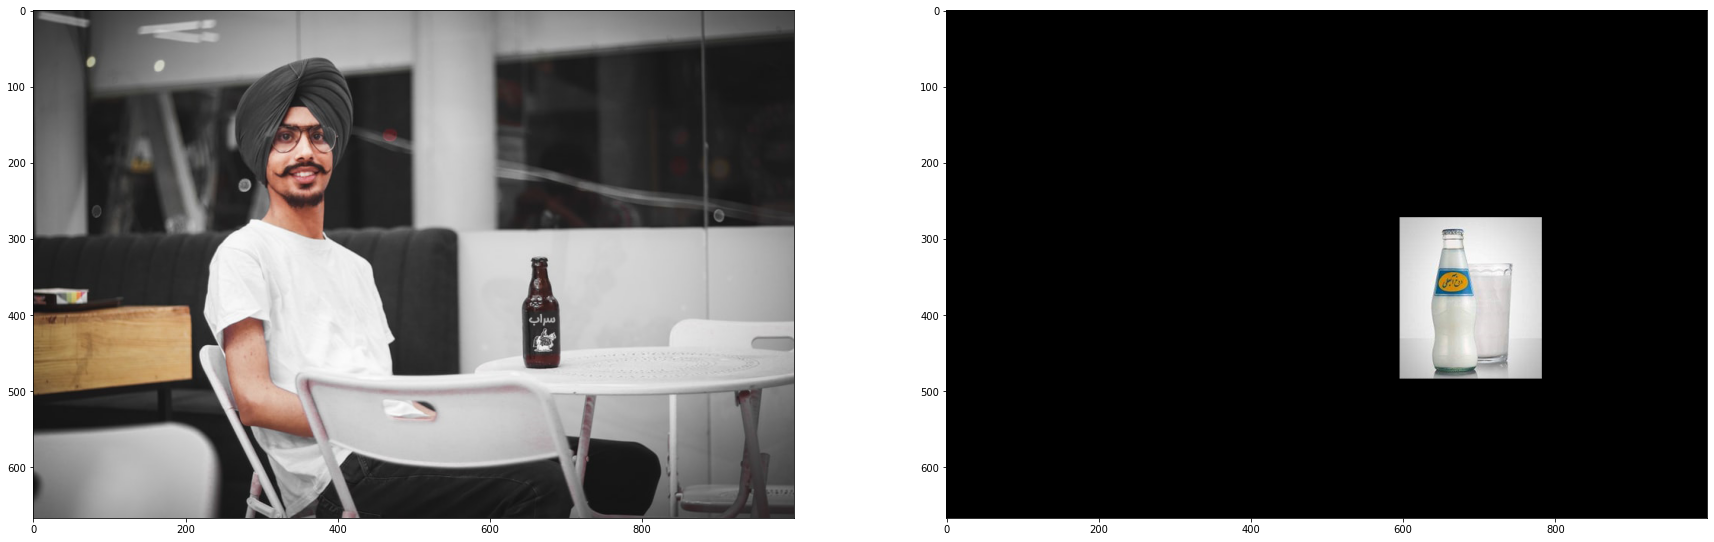

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(30, 40))
axs[0].imshow(img_main)
axs[1].imshow(img_doogh_main)
plt.show()

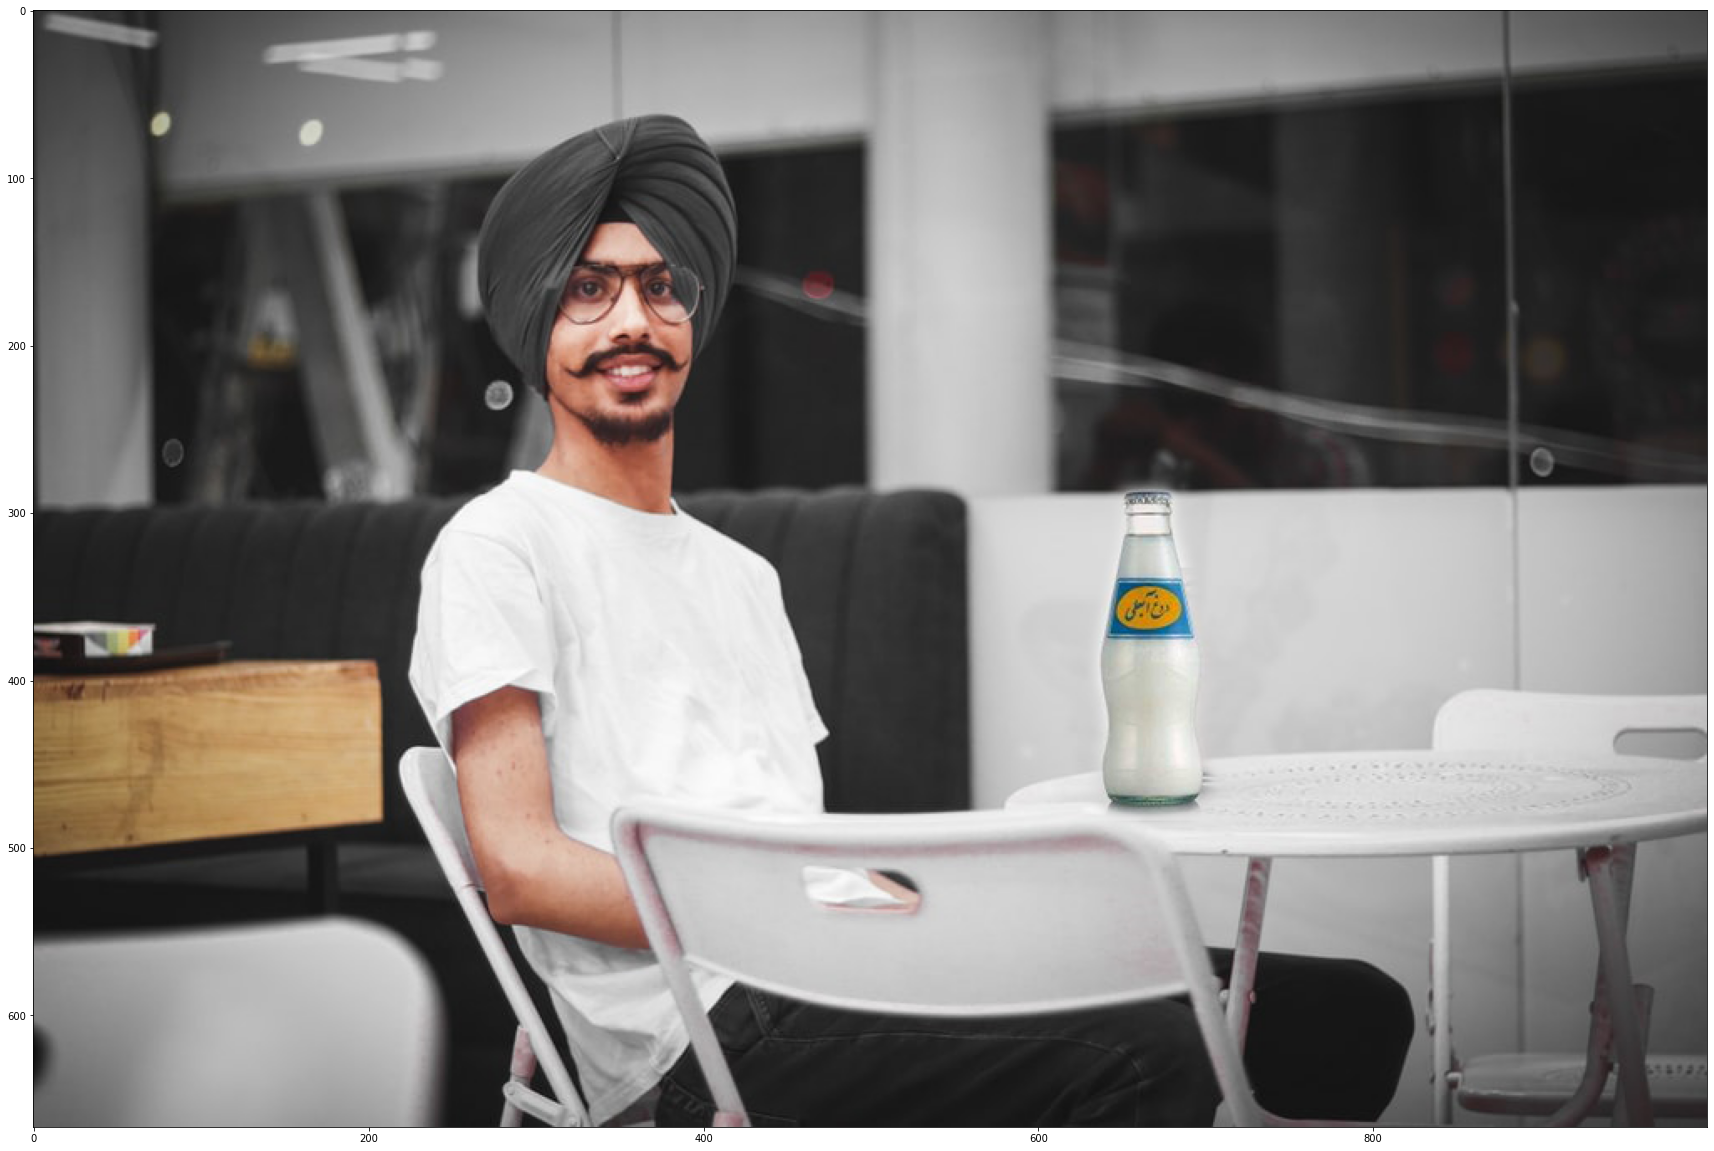

In [ ]:
mask = gaussian_mask/np.amax(gaussian_mask);
img1 = np.multiply(img_main.astype('double'), 1-mask)
img2 = np.multiply(img_doogh_main.astype('double'), mask)
blend = img1 + img2
blend = blend.astype('uint8')
plt.figure(figsize=(30, 40))
plt.imshow(blend)
plt.show()

# **Morphology**

In [ ]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

(400, 600, 3)


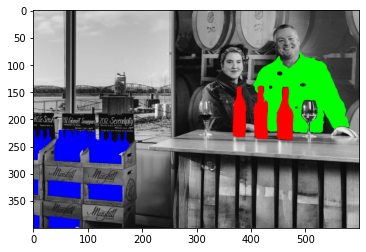

In [ ]:
image = cv2.imread('images/bar255.jpg')
image = cv2.resize(image,(600,400))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
G_channel = np.dstack((image[:,:,1],image[:,:,1],image[:,:,1]))
B_channel = np.dstack((image[:,:,0],image[:,:,0],image[:,:,0]))
R_channel = np.dstack((image[:,:,2],image[:,:,2],image[:,:,2]))
print(G_channel.shape)

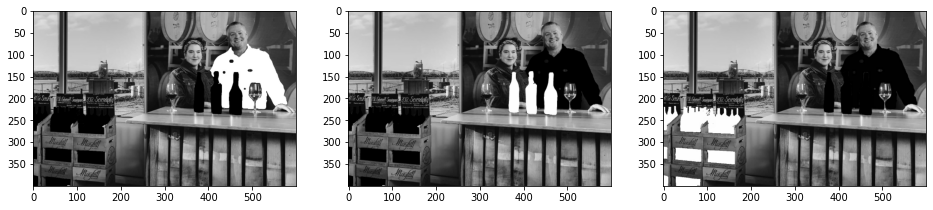

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(16,9))
axs[0].imshow(G_channel)
axs[1].imshow(R_channel)
axs[2].imshow(B_channel)


(400, 600, 3)


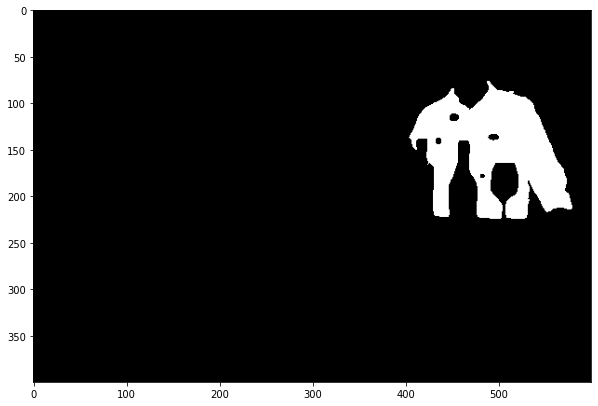

In [ ]:
myTheshold = 250
ret,mask = cv2.threshold(G_channel,myTheshold,255,cv2.THRESH_BINARY)
print(mask.shape)
plt.figure(figsize=(10, 15))
plt.imshow(mask)

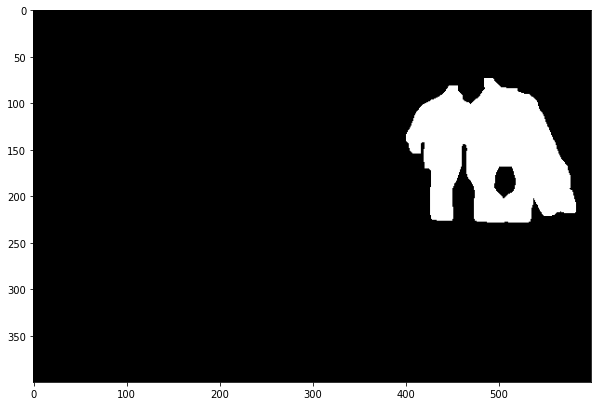

In [ ]:
sizeSE = 8
SE = np.ones((sizeSE, sizeSE))
noHole = cv2.dilate(mask,SE)
plt.figure(figsize=(10, 15))
plt.imshow(noHole)

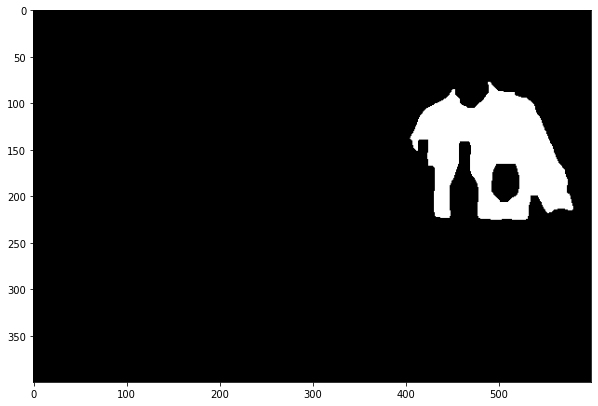

In [ ]:
sizeSE = 8
SE = np.ones((sizeSE, sizeSE))
mainMask = cv2.erode(noHole,SE)
plt.figure(figsize=(10, 15))
plt.imshow(mainMask)

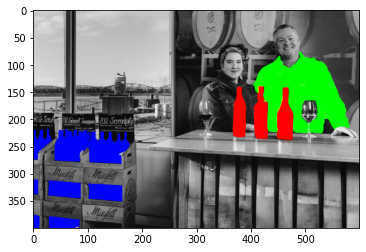

In [ ]:
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if mainMask[i,j,1]:
      image[i,j,1] = 255

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))